# Credit Card Fraud Detection Project
#### Rafael Buck

## 1. Introdução

Fraudes financeiras são uma ameaça cada vez maior no setor financeiro e Data Science e Machine Learning vêm desempenhando um papel imperativo na detecção de fraude em transações on-line. Por exemplo, uma pesquisa da PwC, de crimes econômicos globais de 2016, indica que aproximadamente 36% das organizações sofreram com crimes econômicos. No entanto, a tarefa de detecção de fraude muitas vezes ainda se resume a detecção de valores aberrantes, em que um conjunto de dados é digitalizado para encontrar possíveis anomalias nos dados.

A detecção de fraude em cartões de crédito, portanto, torna-se desafiadora devido a dois motivos: em primeiro lugar, os perfis de comportamentos normais e fraudulentos mudam constantemente; e, em segundo lugar, os conjuntos de dados de fraude de cartão de crédito são altamente distorcidos. O desempenho da detecção de fraude em transações de cartão de crédito é muito afetado pela abordagem de amostragem no conjunto de dados, seleção de variáveis e técnica (s) de detecção utilizada. Em complemento ao exposto acima, a motivação para realização desse trabalho é a relevância para aprimorar conhecimentos na área de cibersegurança. 

## 2. Problema

O problema de Detecção de Fraude em Cartões de Crédito consiste na modelagem de transações passadas de cartão de crédito, em função de um conjunto de atributos que a definem, e com o conhecimento daquelas que resultaram ser fraude. É, portanto, um problema de aprendizagem supervisionada, onde busca-se prever quais transações potencialmente são fraudulentas, prioritariamente minimizando-se falsos positivos (maximizando-se, portanto, verdadeiros positivos).

### 2.1 Tipos de soluções de aprendizado de máquina

Existem três principais tipos de *machine learning* que que podem ser utilizados para solucionar problemas de aprendizado: aprendizagem supervisionada, aprendizagem não supervisionada e aprendizagem por reforço. 

#### Aprendizagem supervisionada
Na aprendizagem supervisionada, classificador é alimentado com dois conjuntos de dados, um conjunto de treinamento e um conjunto de teste. O classificador então “aprende” por meio de um conjunto de exemplos rotulados no conjunto de treinamento para que possa identificar exemplos não rotulados no conjunto de teste com precisão. O objetivo é que o classificador desenvolva uma regra que possa identificar elementos no conjunto de teste.

Algumas ferramentas específicas que podemos usar aqui são: 
- Árvore de decisão;
- Classificação Naive Bayes;
- Regressão de mínimos quadrados ordinários;
- Regressão logística;
- Redes neurais;
- Máquinas de vetores de suporte;
- Métodos de combinação (*ensemble*). 

#### Aprendizagem não supervisionada
Já a aprendizagem não supervisionada usaremos quando enfrentamos o desafio de descobrir relações implícitas, e assim estruturas escondidas, em um determinado conjunto de dados não rotulados.
As ferramentas específicas que podemos usar são: 
- Algoritmos de *clustering*; 
- *Principal Component Analysis* – PCA (análise de componente principal); 
- *Singular Value Decomposition* – SVD (decomposição de valor único); 
- *Independent Component Analysis* – ICA (análise de componente independente). 

#### Aprendizagem por reforço
Por fim, a aprendizagem por reforço se aplica em situações que estão entre os extremos da aprendizagem supervisionada e não supervisionada. Por exemplo, quando existe alguma forma de comentário disponível para cada etapa ou ação preditiva, mas sem uma rotulação ou erro de medida preciso. Podemos utilizar a aprendizagem por esforço quando quiser descobrir como maximizar recompensas, por exemplo, em cenários como controle de robôs, xadrez, gamão, dama e outras atividades que um software pode aprender. 
As ferramentas específicas que podem ser usadas são: 
- Q-Learning;
- TD-Learning;
- Algoritmos genéticos. 

### 2.2 Objetivo desse projeto

O Objetivo desse projeto é encontrar uma solução de *machine learning* para identificar, da maneira mais eficiente possível, transações de cartão de crédito que são fraudulentas. Ou seja, a pergunta que queremos responder é: *"Qual a melhor estratégia para identificar da melhor forma possível fraudes em transações com cartão de crédito?"*

### 2.3 Solução para esse problema

Como os dados do nosso dataset são rotulados, `1` para transações fraudulentas e `0` para transações não fraudulentas, os melhores algoritmos para elaborar uma solução para esse problema são os de **aprendizagem supervisionada**. Vamos testar mais de um modelo de aprendizagem supervisionada, para aumentar a eficiência de nosso modelo final.

Outro detalhe, que vamos comentar mais à frente, é que nesse tipo de problema temos um conjunto de dados extremamente desbalanceado. O número de transações fraudulentas é muito menor que as não fraudulentas. Portanto, temos que elaborar um modelo que identifique bem as transações fraudulentas. No entanto, temos também que tomar cuidado para que o modelo final não classifique muitas transações não fraudulentas como se fossem fraudulentas. Temos que encontrar um meio termo portanto, que será nosso trabalho desse ponto em diante.

Vamos analisar também duas estratégias na busca de uma solução para esse problema:
- Usar os dados dos dois dias embaralhados (com e sem *outliers*) e dividir os dados em treinamento e teste, conforme o usual;
- Usar os dados de apenas um dia (com e sem *outliers*) e usar os dados do outro dia como situação real de validação do modelo final.

## 3. Conjunto de Dados

O Dataset contém transações realizadas com cartões de crédito em setembro de 2013 pelos detentores de cartão europeus. Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos 492 fraudes de 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) representa apenas 0,173% de todas as transações. O conjunto de dados foi coletado e analisado durante uma colaboração de pesquisa da Worldline e do Grupo de Aprendizado de Máquinas (http://mlg.ulb.ac.be) da ULB (Université Libre de Bruxelles) sobre big data mining e detecção de fraude. Mais detalhes sobre projetos atuais e anteriores sobre tópicos relacionados estão disponíveis em http://mlg.ulb.ac.be/BruFence e http://mlg.ulb.ac.be/ARTML. Esse conjunto de dados pode ser encontrado no Kaggle.


### 3.1 Descrição dos dados

O Dataset contém apenas variáveis numéricas de entrada que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não foi possível fornecer os recursos originais e mais informações básicas sobre os dados. Os recursos V1, V2, ... V28 são os principais componentes obtidos com PCA, sendo que os únicos recursos que não foram transformados com PCA são 'Time' e 'Amount'. Portanto, como não há metadados sobre os recursos originais fornecidos, a pré-análise ou o estudo de características não podem ser feitos. 

O atributo 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O atributo ‘Amount’ é o montante da transação, esse recurso pode ser usado, por exemplo, com a experiência sensível ao custo dependente. O atributo 'Class' é a variável de resposta e é necessário o valor 1 em caso de fraude e 0 caso contrário. Não há *missing values* no conjunto de dados.

#### Carregamento das bibliotecas necessárias

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier

#### Carregando os dados

Aqui conseguimos conferir as principais componentes `V1` a `V28` além dos atributos `Time` e `Amout`. Para baixar o Dataset basta acessar o link https://www.kaggle.com/mlg-ulb/creditcardfraud/data.

In [216]:
''' Download link to this Dataset (144MB) https://www.kaggle.com/mlg-ulb/creditcardfraud/data '''

data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Conferindo os tipos dos dados

Nesse comando conseguimos verificar os tipos dos dados. Vejam que são todos numéricos, nenhuma variável é categórica.

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Conferindo a distribuição das amostras

Vejam que aqui confirmamos que o Dataset possui 284.807 transações. Conforme já comentado, o conjunto de dados é altamente desbalanceado, onde a classe positiva (fraudes) representa apenas 0,173% de todas as transações.

In [218]:
fraud_percentage = 100* data[data["Class"] == 1].shape[0]/data.shape[0]
nonfraud_percentage = 100 * data[data["Class"] == 0].shape[0]/data.shape[0]

print("Total of samples: ", data.shape[0])
print("Non-Fraud Transactions: {:.3f}%".format(nonfraud_percentage))
print("Fraud Transactions: {:.3f}%".format(fraud_percentage))

Total of samples:  284807
Non-Fraud Transactions: 99.827%
Fraud Transactions: 0.173%


## 4. Exploração dos Dados

A primeira etapa da nossa análise é explorar algumas amostras de nosso Dataset e verificar a presença de possíveis erros, outliers e inconsistências. Essa etapa é muito importante, e ajuda a preparar os dados da forma adequada aos passos seguintes: Modelagem e Validação. 

Conforme comentado, o Dataset contém apenas variáveis numéricas de entrada que são o resultado de uma transformação PCA, sendo que os únicos recursos que não foram transformados com PCA são 'Time' e 'Amount' (além da coluna *target*, a coluna 'Class'). Portanto, como não há metadados sobre os recursos originais fornecidos, a pré-análise ou o estudo de características não podem ser feitos. Então vamos nos limitar a analisar as características desses dois dados não transformados além de verificar o resultado do PCA.

### 4.1 Distribuição

Vamos verificar a distribuição por classe: 1 = Fraude, 0 = não Fraude.

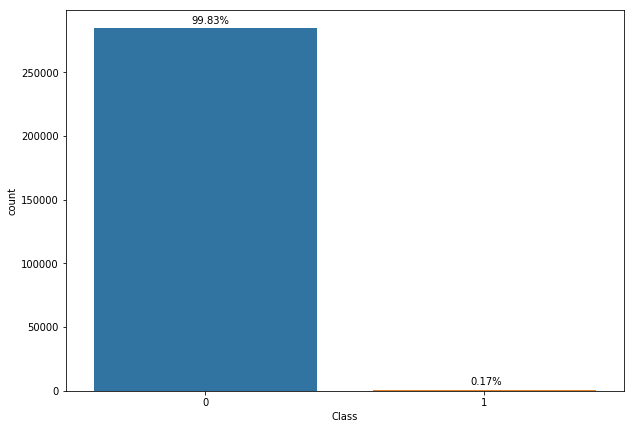

In [219]:
plt.figure(figsize = (10,7))
ax = sns.countplot('Class', data = data)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height() / data.shape[0]), # Add % values to plot
                (p.get_x() + 0.35, p.get_height() + 4000))

Vamos também verificar a distribuição das transações com um simples histograma de 'Amount', e também um histograma de 'Amount' mas apenas para as transações fraudulentas. Vejam que a distribuição dos valores de transação é do tipo *positive skewed* (assimétrico à direita).

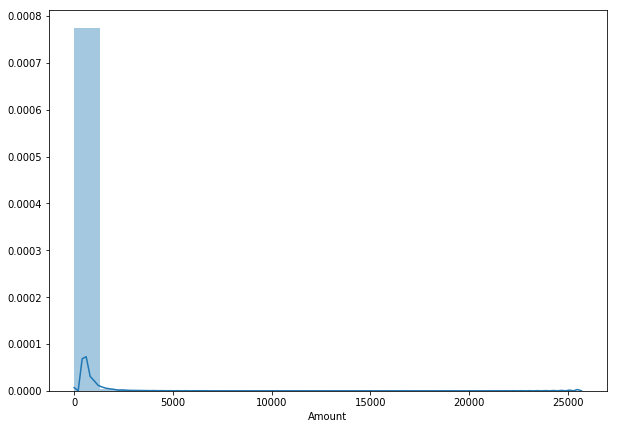

In [220]:
plt.figure(figsize = (10,7))
sns.distplot(data['Amount'], bins = 20)

Agora apenas para as transações fraudulentas.

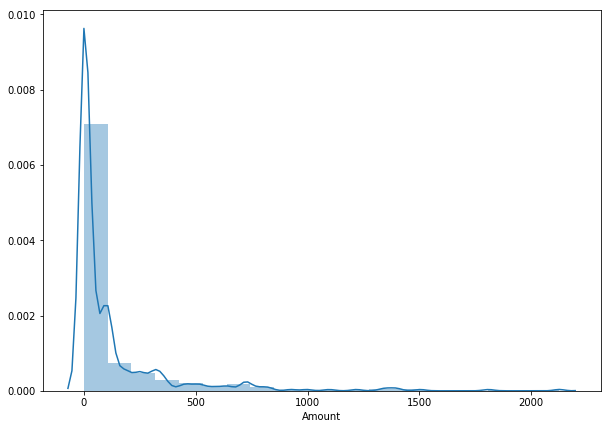

In [221]:
plt.figure(figsize = (10,7))
sns.distplot(data['Amount'][data["Class"] == 1], bins = 20)

Vejam que o Dataset é realmente bastante desbalanceado e bastante concentrado em baixos valores de transação. Um gráfico bastante interessante para olharmos é o *violin plot*, que é muito similar ao *box plot* mas com uma função que estima a densidade de distribuição em cada lado do plot. Abaixo conseguimos ver que a densidade maior das operações fraudulentas são concentradas em valores baixos.

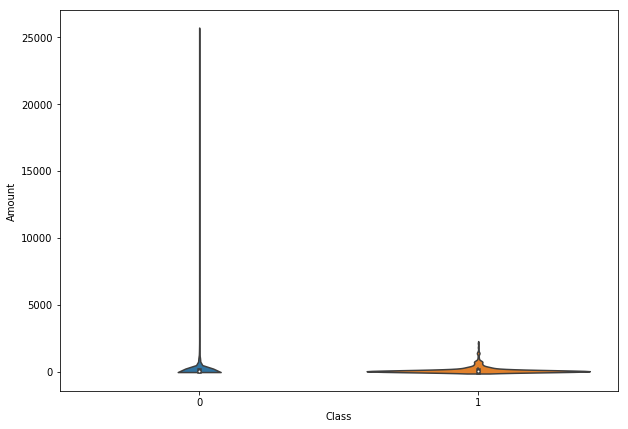

In [222]:
plt.figure(figsize = (10,7))
ax = sns.violinplot(x = "Class", y = "Amount", data = data)

Por fim, vamos dar uma olhada na distribuição dos valores de 'Time'. Lembrando que o atributo 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. Vejam que dá para perceber que realmente são dois dias (duas distribuições distintas), com um vale entre eles (provavelmente a madrugada do dia) e em um dia a distribuição das transações parece ser uma distribuição normal.

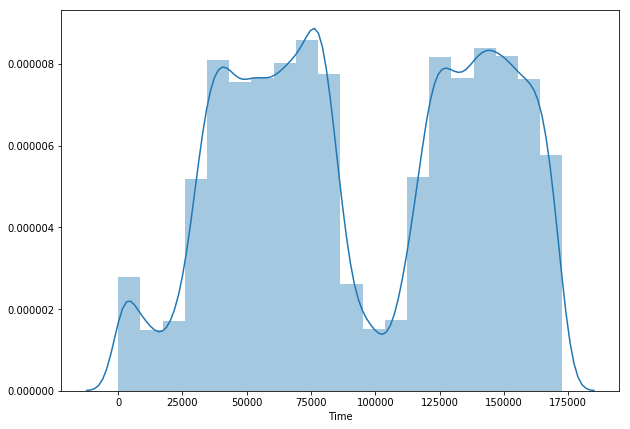

In [223]:
plt.figure(figsize = (10,7))
sns.distplot(data['Time'], bins = 20)

Muito interessante essa característica no nosso Dataset, e vamos explorá-la mais adiante, especialmente para validação do nosso classificador final em uma situação real de operação. Por fim, vamos fazer um *scatter plot* e ver como está a concentração de amostras por 'Class' e 'Amount'.

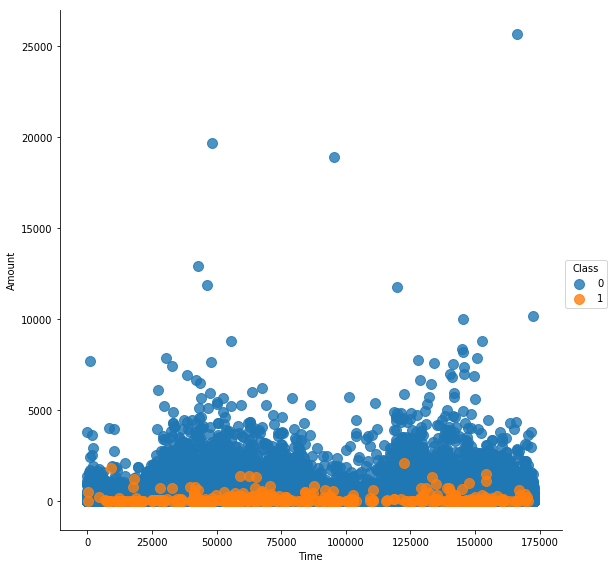

In [224]:
# Create scatterplot of dataframe
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
           data = data, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "Class", # Set color
           size = 8, # Size of the plot
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100}) # S marker size

Novamente, confirmamos a concentração das transações fraudulentas em valores que não ultrapassam USD 2,500.00.

### 4.2 Criação de um novo atributo

Nessa etapa da análise vamos fazer o seguinte: que tal olhar a transação do ponto de vista dela no decorrer de um dia (ou seja, dentro de 24h de um dia, e não de 48h de dois dias). Para isso, criaremos um novo atributo derivado de 'Time', denominado 'DayTime'.

In [225]:
data["DayTime"] = data["Time"]
data["DayTime"] = np.where( data['DayTime'] >= 86400, # if >= 86400 seconds = (1 day)
                           data['DayTime'] % 86400, # if >= 86400 seconds, get rest of division
                           data['DayTime']) # else

Vamos ver como ficou a distribuição.

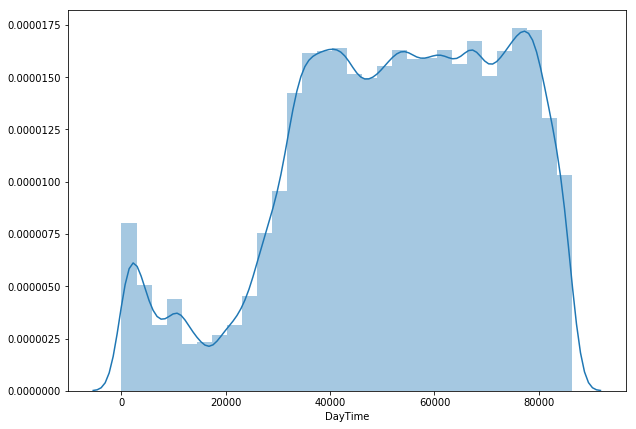

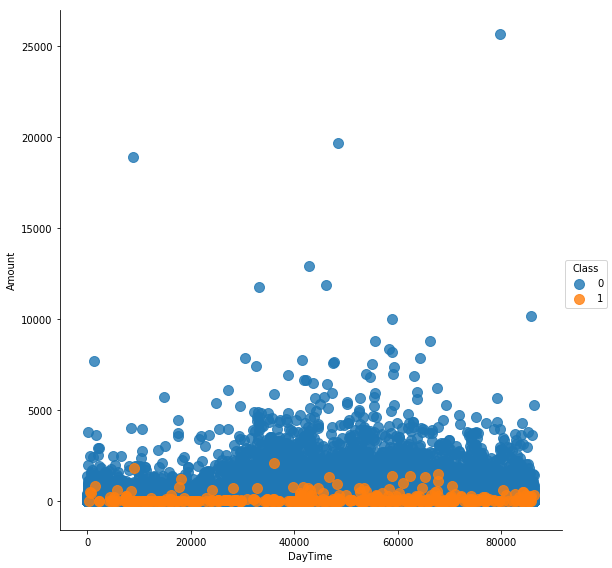

In [226]:
plt.figure(figsize = (10,7))
sns.distplot(data['DayTime'], bins = 30)

# Create scatterplot of dataframe
sns.lmplot('DayTime', # Horizontal axis
           'Amount', # Vertical axis
           data = data, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "Class", # Set color
           size = 8, # Size of the plot
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100}) # S marker siz

Confirmando se todas as amostras estão entre 0 e 86.400 segundos.

In [227]:
data["DayTime"].describe()

count    284807.000000
mean      52336.622709
std       21049.420490
min           0.000000
25%       38153.500000
50%       54039.000000
75%       69587.000000
max       86398.000000
Name: DayTime, dtype: float64

### 4.3 Correlações e dimensionalidades do Dataset final

Aqui uma análise final, é verificar como as variáveis se correlacionam. Como esperado, as variáveis que passaram pelo processo de PCA não possuem quaisquer correlações entre elas, o que faz muito sentido uma vez que esse processo atribui uma ortogonalidade entre essas dimensões.

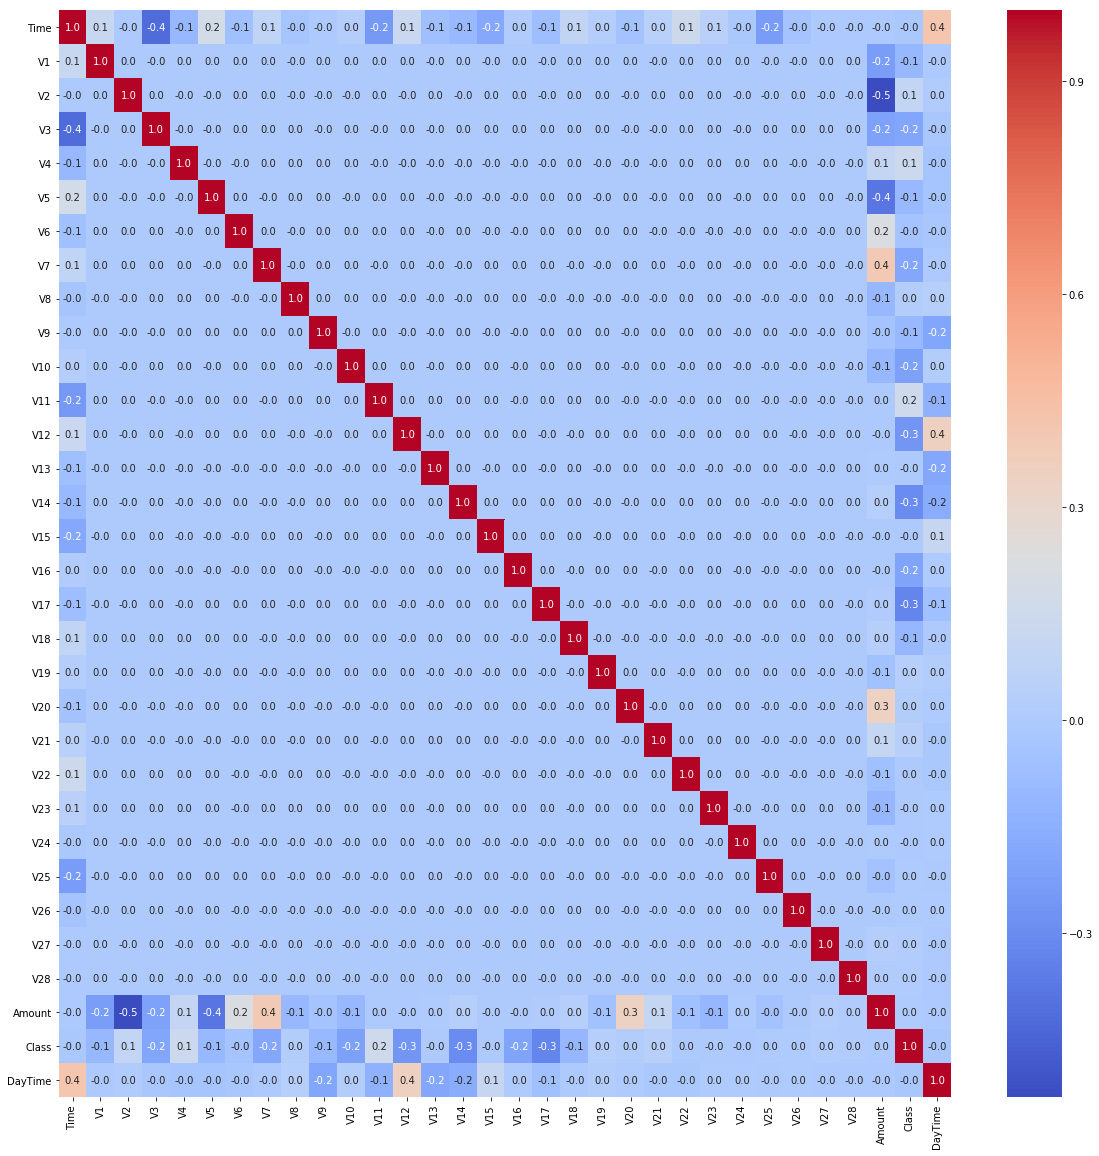

In [228]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f')

É interessante observar certas correlações, como 'Amount' com V2 e V5, mas como não temos acesso ao que essas variáveis representam fica um pouco difícil realizar uma análise mais detalhada.

### 4.3 Outliers

Para estudar a influência dos *outliers* em nosso modelo, vamos criar *subsets* do nosso Dataset onde removeremos amostras potencialmente discrepantes utilizando o método de Tukey para remover *outliers*.

## 5. Seleção do Modelo

### 5.1 Modelos disponíveis

Vamos usar como referência, o benchmarking do próprio scikit-learn, e duas estratégias para encontrar a melhor solução para esse problema (as estratégias são apresentadas nas seções 5.3 e 5.4).

<img src="ml_map.png" width="80%"/>

Com base na figura acima, considerando que temos disponível mais de 280.000 amostras, e que temos um problema de classificação onde conhecemos as categorias, vamos testar 3 modelos para encontrar o melhor classificador. São eles:
- **Logistic Regression Classifier (LRG)**: é um dos modelos mais simples de classificação, e funciona muito bem quando os dados são linearmente separáveis. Pelo observado nas figuras acima, não está muito claro se os dados são linearmente separáveis, mas nesse caso não custa tentar para ver o resultado, até para servir como benchmarking para os demais métodos abaixo, que são mais robustos.
- **SGD Classifier (SGD)**: Esse estimador implementa modelos lineares regularizados com aprendizagem de gradiente estocástico (SGD): o gradiente da perda é estimado em cada amostra e o modelo é atualizado ao longo do caminho com um cronograma de força decrescente (também conhecido como taxa de aprendizado).
- **XGBoost Classifier (XGB)**: O XGBoost é um método *ensemble*. O objetivo dos métodos *ensemble* é combinar as previsões de vários estimadores básicos, construídos com um determinado algoritmo de aprendizagem, para melhorar a generalização/robustez do modelo em um único estimador. O XGBoost é uma implementação de árvores de decisão com gradient boost, projetada para velocidade e desempenho.

### 5.2 Métrica que será utilizada

Dado o desbalanceamento do Dataset, é recomendado medir a precisão usando a **Area Under the Precision-Recall Curve (AUPRC)**. A precisão da matriz de confusão não é significativa e falha para um problema com esse grau de desbalanceamento assim como a análise de precisão, pois:
- Com relação à análise da precisão, apesar de ser uma abordagem para avaliar a correção do modelo de computação, em um conjunto de dados altamente distorcido como este, sabemos que, mesmo que possamos prever todos os valores como não fraudulentos, teremos apenas 492 previsões erradas de 284,807 no total. Assim, a precisão é excelente, mas ainda não resolve o nosso problema, pois queremos identificar tantos casos de fraude quanto possível. Portanto, não podemos usar a precisão como um fator decisivo aqui;
- Com relação à Matriz de Confusão, simplesmente a tabulação da matriz de confusão não proporcionará uma compreensão clara do desempenho dos dados. Isso ocorre porque o número total de casos de fraude é muito menor e a variação na matriz de confusão será tão pequena que será equivalente a um erro justificado em um conjunto de dados equilibrado. Então, esta medida também é descartada.

### 5.3 Estratégia 1: usar os dois dias do Dataset, embaralhados

No que consiste essa estratégia?
- Vamos considerar os dados dos dois dias embaralhados, utilizando como referência o atributo que criamos (DayTime), que mostra o segundo dentro das 24 horas do dia em que a transação foi realizada;
- Vamos realizar *feature scaling* nos atributos 'Amount' (chamando o atributo escalonado de V29) e 'DayTime' (chamando o atributo escalonado de V30) e remover 'Time', 'Amount' e 'DayTime';
- Vamos analisar a melhor forma de dividir o conjunto de treino e de testes;
- Vamos analisar os k melhores atributos necessários para modelagem;
- Vamos, então, dividir os dados embaralhados em treino e teste para modelagem e validar o modelo final com o próprio conjunto de testes que é composto de certa forma com dados dos dois dias.

#### 5.3.1 Feature Scaling

O dimensionamento de recursos pode ser uma importante etapa de pré-processamento para muitos algoritmos de aprendizado de máquina. A padronização envolve o reescalonamento dos recursos de modo que eles tenham as propriedades de uma distribuição normal padrão com uma média de zero e um desvio padrão de um. Isso também ajuda a diminuir a influência de valores muito altos nos pesos dos algoritmos.

Aqui vamos usar o **MinMaxScaler**, um estimador que escala e traduz cada característica individualmente de tal modo que está no intervalo dado no conjunto de treino, isto é, entre zero e um.

In [232]:
m1_scaled_data = pd.DataFrame(data = data, copy = True)
m1_scaled_data['V29'] = MinMaxScaler().fit_transform(m1_scaled_data['Amount'].values.reshape(-1, 1))
m1_scaled_data['V30'] = MinMaxScaler().fit_transform(m1_scaled_data['DayTime'].values.reshape(-1, 1))
m1_scaled_data = m1_scaled_data.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m1_scaled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000012
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000012
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000023


#### Separando as *features* (X) do *target* (y)
Aqui separamos as features e o target do Dataset inteiro, mais de 280.000 amostras para nossa primeira análise, que consiste em considerar os dois dias inteiros embaralhados.

In [233]:
m1_X = m1_scaled_data.iloc[:, m1_scaled_data.columns != 'Class']
m1_y = m1_scaled_data.iloc[:, m1_scaled_data.columns == 'Class']

#### 5.3.2 Intelligent Feature Selection and Data Splitting

Vamos, nessa etapa, descobrir quais os melhores cortes do nosso Dataset (variável `test_size` da função `train_test_split`), ou seja, qual o impacto em nossa métrica tem o valor % que definimos nos nossos conjuntos de treino e teste. Também vamos verificar quantos k melhores atributos precisamos usar para ter um bom modelo: todos os atributos ou apenas um subconjunto dele?

In [250]:
df = pd.DataFrame(columns = ['k selected','test size','auc'])
test_range = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in test_range:
    for k in range(25, len(m1_X.columns) + 1):
        
        t0 = time()
        
        selectK = SelectKBest(f_classif, k = k)
        selectK.fit(m1_X, m1_y.values.ravel())
        X_sel = selectK.transform(m1_X)

        X_train, X_test, y_train, y_test = \
           train_test_split(X_sel, m1_y, random_state = 46, stratify = m1_y, test_size = t)

        clf = LogisticRegression()
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        auc = metrics.roc_auc_score(y_test, y_pred)
        
        tf = round(time() - t0, 3)
        
        print("test_size = ", t, ", k Best = ", k, ", AUC(LRG) = ", auc, ", Time = ", tf, "s")
        
        register = []
        register.append(k)
        register.append(t)
        register.append(auc)
        df_register = pd.DataFrame([register], columns = df.keys())
        df = df.append(df_register)

test_size =  0.3 , k Best =  25 , AUC(LRG) =  0.807350364316 , Time =  12.611 s
test_size =  0.3 , k Best =  26 , AUC(LRG) =  0.807350364316 , Time =  12.229 s
test_size =  0.3 , k Best =  27 , AUC(LRG) =  0.800593607559 , Time =  12.161 s
test_size =  0.3 , k Best =  28 , AUC(LRG) =  0.800599469567 , Time =  19.615 s
test_size =  0.3 , k Best =  29 , AUC(LRG) =  0.803977847946 , Time =  44.757 s
test_size =  0.3 , k Best =  30 , AUC(LRG) =  0.807356226324 , Time =  46.375 s
test_size =  0.4 , k Best =  25 , AUC(LRG) =  0.822251491272 , Time =  37.671 s
test_size =  0.4 , k Best =  26 , AUC(LRG) =  0.819713420206 , Time =  39.547 s
test_size =  0.4 , k Best =  27 , AUC(LRG) =  0.822251491272 , Time =  41.911 s
test_size =  0.4 , k Best =  28 , AUC(LRG) =  0.81717534914 , Time =  25.067 s
test_size =  0.4 , k Best =  29 , AUC(LRG) =  0.824789562338 , Time =  12.351 s
test_size =  0.4 , k Best =  30 , AUC(LRG) =  0.819713420206 , Time =  11.816 s
test_size =  0.5 , k Best =  25 , AUC(LRG

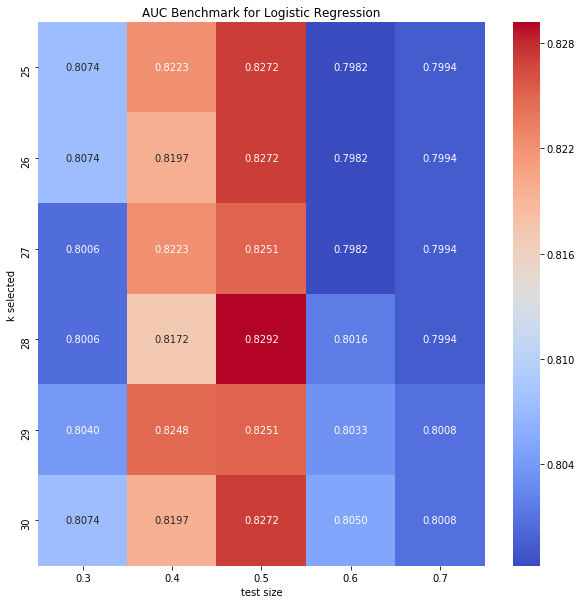

In [251]:
benchmark = df.pivot("k selected", "test size", "auc")
plt.figure(figsize = (10,10))
plt.title("AUC Benchmark for Logistic Regression")
ax = sns.heatmap(benchmark, annot = True, cmap = 'coolwarm', fmt = '.4f')

Os resultados indicam que dividir o nosso conjunto de treinamento em 50% é a melhor escolha. Selecionar entre 28 e 30 features fica na região onde se encontram os melhores classificadores do método que usamos como referência. Os melhores resultados são aqueles com maior AUC (mais vermelhos).

#### 5.3.3 Comparando os modelos de machine learning

Nesse ponto, vamos usar os resultados obtidos até agora para definir qual dos 3 classificadores que elencamos (LRG, XGB e SGD) apresenta o melhor desempenho.

In [253]:
for k in range(28, len(m1_X.columns) + 1):
        
    t0 = time()        
    selectK = SelectKBest(f_classif, k = k)
    selectK.fit(m1_X, m1_y.values.ravel())
    X_sel = selectK.transform(m1_X)

    X_train, X_test, y_train, y_test = \
        train_test_split(X_sel, m1_y, random_state = 46, stratify = m1_y, test_size = 0.5)
    
    # LRG
    clf = LogisticRegression()
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(LRG) = ", auc, ", Time = ", tf, "s")

    t0 = time()
    # XGB
    clf = XGBClassifier()
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(XGB) = ", auc, ", Time = ", tf, "s")

    t0 = time()
    # SGD
    clf = SGDClassifier(tol=1e-6)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(SGD) = ", auc, ", Time = ", tf, "s")

k Best =  28 , AUC(LRG) =  0.829187396778 , Time =  14.39 s
k Best =  28 , AUC(XGB) =  0.877981953436 , Time =  35.751 s
k Best =  28 , AUC(SGD) =  0.792602030925 , Time =  0.415 s
k Best =  29 , AUC(LRG) =  0.825118838915 , Time =  15.13 s
k Best =  29 , AUC(XGB) =  0.877981953436 , Time =  33.841 s
k Best =  29 , AUC(SGD) =  0.804797152876 , Time =  0.528 s
k Best =  30 , AUC(LRG) =  0.827154876453 , Time =  13.333 s
k Best =  30 , AUC(XGB) =  0.880014473761 , Time =  38.703 s
k Best =  30 , AUC(SGD) =  0.796660037149 , Time =  0.401 s


Aqui podemos avaliar que o XGBoost Classifier apresentou o melhor desempenho quando analisamos do ponto de vista da métrica AUPRC, apresentando um resultado bastante superior aos demais (AUC = 0.8800). Ele também fez uso de todas as features (30) para chegar no melhor desempenho.

#### 5.3.4 Removendo *outliers* e verificando se melhora o desempenho

Identificar *outliers* é extremamente importante na modelagem de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos o **Método Tukey para identificar discrepantes**: Um passo do discrepante é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

In [327]:
m1_scaled_data_nooutliers = pd.DataFrame(data = data, copy = True)

In [328]:
# Q1 (25º percentil dos dados) para o atributo dado
Q1 = np.percentile(m1_scaled_data_nooutliers['Amount'],25)
# Q3 (75º percentil dos dados) para o atributo dado
Q3 = np.percentile(m1_scaled_data_nooutliers['Amount'],75)
# Amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
step = (Q3-Q1)*1.5
# Dataset dos outliers
outliers = m1_scaled_data_nooutliers[~((m1_scaled_data_nooutliers['Amount'] >= Q1 - step) & 
                                       (m1_scaled_data_nooutliers['Amount'] <= Q3 + step))]
# Dataset sem outliers
m1_scaled_data_nooutliers = m1_scaled_data_nooutliers[(m1_scaled_data_nooutliers['Amount'] >= Q1 - step) & 
                                                      (m1_scaled_data_nooutliers['Amount'] <= Q3 + step)]

In [329]:
m1_scaled_data_nooutliers['V29'] = MinMaxScaler().fit_transform(m1_scaled_data_nooutliers['Amount'].values.reshape(-1, 1))
m1_scaled_data_nooutliers['V30'] = MinMaxScaler().fit_transform(m1_scaled_data_nooutliers['DayTime'].values.reshape(-1, 1))
m1_scaled_data_nooutliers = m1_scaled_data_nooutliers.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m1_scaled_data_nooutliers.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.810949,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.014580,0.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.669377,0.000012
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.379350,0.000023
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,0.019892,0.000023


In [330]:
m1_X_nooutliers = m1_scaled_data_nooutliers.iloc[:, m1_scaled_data_nooutliers.columns != 'Class']
m1_y_nooutliers = m1_scaled_data_nooutliers.iloc[:, m1_scaled_data_nooutliers.columns == 'Class']

In [331]:
X_train, X_test, y_train, y_test = \
    train_test_split(m1_X_nooutliers, m1_y_nooutliers, random_state = 46, stratify = m1_y_nooutliers, test_size = 0.5)

t0 = time()

# XGB
clf = XGBClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
        
tf = round(time() - t0, 3)       
print("AUC(XGB) no outliers = ", auc, ", Time = ", tf, "s")

AUC(XGB) no outliers =  0.910384395359 , Time =  31.684 s


Olha que resultado interessante. Apenas removendo os *outliers* o desempenho do nosso classificador aumentou 3,5%, de 0.8800 para 0.9103. No entanto, vamos calcular o desempenho do classificador no Dataset com todos os *outliers*, para ver o desempenho.

In [332]:
outliers['V29'] = MinMaxScaler().fit_transform(outliers['Amount'].values.reshape(-1, 1))
outliers['V30'] = MinMaxScaler().fit_transform(outliers['DayTime'].values.reshape(-1, 1))
outliers = outliers.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m1_X_outliers = outliers.iloc[:, outliers.columns != 'Class']
m1_y_outliers = outliers.iloc[:, outliers.columns == 'Class']

In [333]:
auc = metrics.roc_auc_score(m1_y_outliers, clf.predict(m1_X_outliers))        
print("Outliers Dataset AUC", auc)

Outliers Dataset AUC 0.826055521843


O desempenho do classificador no conjunto dos *outliers* é baixo. Se fizermos a média, o AUC do classificador criado no conjunto sem outliers é de:
- AUC médio = (0.9103 + 0.8260)/2 = 0.8682

O que é abaixo do AUC do classificador criado com o Dataset considerando os *outliers*.

#### 5.3.5 Resultado final da Estratégia 1

O resultado final para a Estratégia 1 é:
- melhor classificador: XGBoost Classifier;
- usar estratégia de remoção de outliers (Tukey): nope;
- melhor divisão do Dataset total (com os dois dias embaralhados): 50% para treino, 50% para testes;
- melhores features: todas;
- AUC: 0.8800 (sem *tunning* do modelo).

### 5.4 Estratégia 2: usar um dia do Dataset para modelar e outro dia para Validar o modelo final

No que consiste essa estratégia?
- Vamos considerar apenas um dia do Dataset para modelagem, utilizando como referência o atributo (Time);
- Os dados do outro dia serão utilizados como uma situação de uso real do nosso modelo final;
- Vamos realizar *feature scaling* nos atributos 'Amount' (chamando o atributo escalonado de V29) e 'Time' (chamando o atributo escalonado de V30) e remover 'Time', 'Amount' e 'DayTime';
- Vamos analisar a melhor forma de dividir o conjunto de treino e de testes de um dos dias;
- Vamos analisar os k melhores atributos necessários para modelagem;
- Vamos, então, usar os dados de um dia para modelagem (treino e teste). No entanto, vamos pegar o modelo final e confrontrar os resultados obtidos com a aplicação dele no segundo dia, como se fosse uma situação real.

#### 5.4.1 Feature Scaling

Também utilizamos aqui a função **MinMaxScaler** apenas mudando um pouco os atributos que aplicamos.

In [334]:
m2_scaled_data = pd.DataFrame(data = data[data["Time"] < 86400], copy = True)
m2_scaled_data['V29'] = MinMaxScaler().fit_transform(m2_scaled_data['Amount'].values.reshape(-1, 1))
m2_scaled_data['V30'] = MinMaxScaler().fit_transform(m2_scaled_data['Time'].values.reshape(-1, 1))
m2_scaled_data = m2_scaled_data.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m2_scaled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.007612,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000137,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.019264,0.000012
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.006283,0.000012
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.003561,0.000023


#### Separando as *features* (X) do *target* (y)
Aqui separamos as features e o target do primeiro dia do Dataset, mais de 140.000 amostras para nossa segunda análise, que consiste em considerar os apenas um dia inteiro para modelar (treino e teste) e deixar o outro dia para simular uma operação real.

In [335]:
m2_X = m2_scaled_data.iloc[:, m2_scaled_data.columns != 'Class']
m2_y = m2_scaled_data.iloc[:, m2_scaled_data.columns == 'Class']

#### 5.4.2 Intelligent Feature Selection and Data Splitting

Vamos, nessa etapa, repetir o procedimento da estratégia anterior, agora em outro subconjunto do Dataset.

In [336]:
df = pd.DataFrame(columns = ['k selected','test size','auc'])
test_range = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in test_range:
    for k in range(25, len(m2_X.columns) + 1):
        
        t0 = time()
        
        selectK = SelectKBest(f_classif, k = k)
        selectK.fit(m2_X, m2_y.values.ravel())
        X_sel = selectK.transform(m2_X)

        X_train, X_test, y_train, y_test = \
           train_test_split(X_sel, m2_y, random_state = 46, stratify = m2_y, test_size = t)

        clf = LogisticRegression()
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        auc = metrics.roc_auc_score(y_test, y_pred)
        
        tf = round(time() - t0, 3)
        
        print("test_size = ", t, ", k Best = ", k, ", AUC(LRG) = ", auc, ", Time = ", tf, "s")
        
        register = []
        register.append(k)
        register.append(t)
        register.append(auc)
        df_register = pd.DataFrame([register], columns = df.keys())
        df = df.append(df_register)

test_size =  0.3 , k Best =  25 , AUC(LRG) =  0.791505197761 , Time =  8.049 s
test_size =  0.3 , k Best =  26 , AUC(LRG) =  0.791505197761 , Time =  6.948 s
test_size =  0.3 , k Best =  27 , AUC(LRG) =  0.791505197761 , Time =  6.24 s
test_size =  0.3 , k Best =  28 , AUC(LRG) =  0.791505197761 , Time =  6.73 s
test_size =  0.3 , k Best =  29 , AUC(LRG) =  0.791505197761 , Time =  7.03 s
test_size =  0.3 , k Best =  30 , AUC(LRG) =  0.791505197761 , Time =  7.97 s
test_size =  0.4 , k Best =  25 , AUC(LRG) =  0.812326998599 , Time =  7.102 s
test_size =  0.4 , k Best =  26 , AUC(LRG) =  0.816791284313 , Time =  7.893 s
test_size =  0.4 , k Best =  27 , AUC(LRG) =  0.812326998599 , Time =  7.804 s
test_size =  0.4 , k Best =  28 , AUC(LRG) =  0.812326998599 , Time =  6.648 s
test_size =  0.4 , k Best =  29 , AUC(LRG) =  0.807854062814 , Time =  6.832 s
test_size =  0.4 , k Best =  30 , AUC(LRG) =  0.812318348529 , Time =  7.295 s
test_size =  0.5 , k Best =  25 , AUC(LRG) =  0.82252202

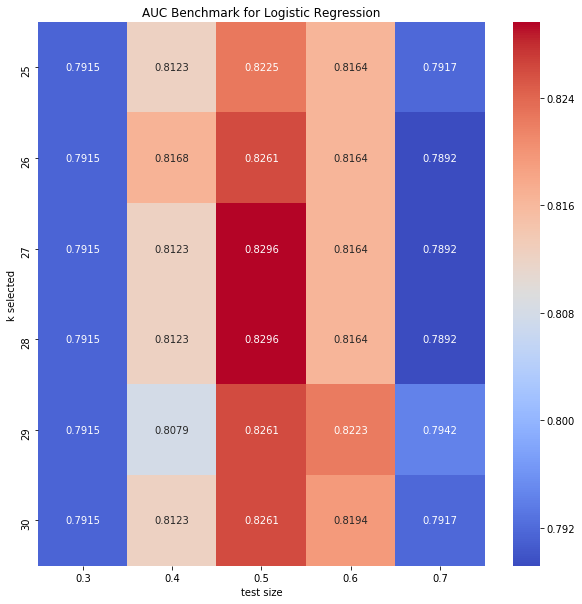

In [337]:
benchmark = df.pivot("k selected", "test size", "auc")
plt.figure(figsize = (10,10))
plt.title("AUC Benchmark for Logistic Regression")
ax = sns.heatmap(benchmark, annot = True, cmap = 'coolwarm', fmt = '.4f')

Os resultados indicam que dividir o nosso conjunto de treinamento em 50% é a melhor escolha. Selecionar entre 26 e 30 features fica na região onde se encontram os melhores classificadores do método que usamos como referência. Relembrando, os melhores resultados são aqueles com maior AUC (mais vermelhos).

#### 5.4.3 Comparando os modelos de machine learning

Nesse ponto, vamos usar os resultados obtidos até agora para definir qual dos 3 classificadores que elencamos (LRG, XGB e SGD) apresenta o melhor desempenho.

In [339]:
for k in range(26, len(m2_X.columns) + 1):
        
    t0 = time()        
    selectK = SelectKBest(f_classif, k = k)
    selectK.fit(m2_X, m2_y.values.ravel())
    X_sel = selectK.transform(m2_X)

    X_train, X_test, y_train, y_test = \
        train_test_split(X_sel, m2_y, random_state = 46, stratify = m2_y, test_size = 0.5)
    
    # LRG
    clf = LogisticRegression()
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(LRG) = ", auc, ", Time = ", tf, "s")

    t0 = time()
    # XGB
    clf = XGBClassifier()
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(XGB) = ", auc, ", Time = ", tf, "s")

    t0 = time()
    # SGD
    clf = SGDClassifier(tol=1e-6)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred)
        
    tf = round(time() - t0, 3)       
    print("k Best = ", k, ", AUC(SGD) = ", auc, ", Time = ", tf, "s")

k Best =  26 , AUC(LRG) =  0.826061208937 , Time =  6.738 s
k Best =  26 , AUC(XGB) =  0.886434859787 , Time =  15.021 s
k Best =  26 , AUC(SGD) =  0.804798453639 , Time =  0.1 s
k Best =  27 , AUC(LRG) =  0.829607308227 , Time =  7.091 s
k Best =  27 , AUC(XGB) =  0.900619256951 , Time =  15.511 s
k Best =  27 , AUC(SGD) =  0.822508189422 , Time =  0.135 s
k Best =  28 , AUC(LRG) =  0.829607308227 , Time =  6.094 s
k Best =  28 , AUC(XGB) =  0.904165356241 , Time =  17.202 s
k Best =  28 , AUC(SGD) =  0.818975930579 , Time =  0.133 s
k Best =  29 , AUC(LRG) =  0.826054288713 , Time =  5.788 s
k Best =  29 , AUC(XGB) =  0.900619256951 , Time =  15.436 s
k Best =  29 , AUC(SGD) =  0.790607136252 , Time =  0.159 s
k Best =  30 , AUC(LRG) =  0.826054288713 , Time =  6.598 s
k Best =  30 , AUC(XGB) =  0.900619256951 , Time =  16.351 s
k Best =  30 , AUC(SGD) =  0.815429831288 , Time =  0.141 s


Aqui podemos avaliar que o XGBoost Classifier apresentou novamente o melhor desempenho quando analisamos do ponto de vista da métrica AUPRC, apresentando um resultado bastante superior aos demais (AUC = 0.9042). Ele também fez uso das 28 melhores features para chegar no melhor desempenho.

#### 5.4.4 Removendo *outliers* e verificando se melhora o desempenho

Novamente usaremos o **Método Tukey para identificar discrepantes** para remoção dos outliers.

In [357]:
m2_scaled_data_nooutliers = pd.DataFrame(data = data[data["Time"] < 86400], copy = True)

In [358]:
# Q1 (25º percentil dos dados) para o atributo dado
Q1 = np.percentile(m2_scaled_data_nooutliers['Amount'],25)
# Q3 (75º percentil dos dados) para o atributo dado
Q3 = np.percentile(m2_scaled_data_nooutliers['Amount'],75)
# Amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
step = (Q3-Q1)*1.5
# Dataset dos outliers
outliers = m2_scaled_data_nooutliers[~((m2_scaled_data_nooutliers['Amount'] >= Q1 - step) & 
                                       (m2_scaled_data_nooutliers['Amount'] <= Q3 + step))]
# Dataset sem outliers
m2_scaled_data_nooutliers = m2_scaled_data_nooutliers[(m2_scaled_data_nooutliers['Amount'] >= Q1 - step) & 
                                                      (m2_scaled_data_nooutliers['Amount'] <= Q3 + step)]

In [359]:
m2_scaled_data_nooutliers['V29'] = MinMaxScaler().fit_transform(m2_scaled_data_nooutliers['Amount'].values.reshape(-1, 1))
m2_scaled_data_nooutliers['V30'] = MinMaxScaler().fit_transform(m2_scaled_data_nooutliers['Time'].values.reshape(-1, 1))
m2_scaled_data_nooutliers = m2_scaled_data_nooutliers.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m2_scaled_data_nooutliers.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.783351,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.014084,0.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.646597,0.000012
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.366440,0.000023
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,0.019215,0.000023


In [360]:
m2_X_nooutliers = m2_scaled_data_nooutliers.iloc[:, m2_scaled_data_nooutliers.columns != 'Class']
m2_y_nooutliers = m2_scaled_data_nooutliers.iloc[:, m2_scaled_data_nooutliers.columns == 'Class']

In [361]:
selectK = SelectKBest(f_classif, k = 28)
selectK.fit(m2_X_nooutliers, m2_y_nooutliers.values.ravel())
X_sel = selectK.transform(m2_X_nooutliers)

X_train, X_test, y_train, y_test = \
    train_test_split(X_sel, m2_y_nooutliers, random_state = 46, stratify = m2_y_nooutliers, test_size = 0.5)

t0 = time()

# XGB
clf = XGBClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
        
tf = round(time() - t0, 3)       
print("AUC(XGB) no outliers = ", auc, ", Time = ", tf, "s")

AUC(XGB) no outliers =  0.905117930605 , Time =  14.012 s


Aqui, apesar de ligeiramente maior o AUC (0.9051 contra os 0.9043 anterior) não teve muita melhora. Vamos, por desencargo de consciência ver o desempenho nos *outliers*. Se for menor, já sabemos novamente que a remoção dos outliers não melhora o desempenho de nosso modelo.

In [362]:
outliers['V29'] = MinMaxScaler().fit_transform(outliers['Amount'].values.reshape(-1, 1))
outliers['V30'] = MinMaxScaler().fit_transform(outliers['Time'].values.reshape(-1, 1))
outliers = outliers.drop(['Time', 'Amount', 'DayTime'], axis = 1)
m2_X_outliers = outliers.iloc[:, outliers.columns != 'Class']
m2_y_outliers = outliers.iloc[:, outliers.columns == 'Class']

In [364]:
auc = metrics.roc_auc_score(m2_y_outliers, clf.predict(selectK.transform(m2_X_outliers)))        
print("Outliers Dataset AUC", auc)

Outliers Dataset AUC 0.84693877551


O desempenho do classificador no conjunto dos *outliers* é baixo. Se fizermos a média, o AUC do classificador criado no conjunto sem outliers é de:
- AUC médio = (0.9051 + 0.8469)/2 = 0.8760

O que é abaixo do AUC do classificador criado com o Dataset considerando os *outliers*.

#### 5.4.5 Resultado final da Estratégia 2

O resultado final para a Estratégia 2 é:
- melhor classificador: XGBoost Classifier;
- usar estratégia de remoção de outliers (Tukey): nope;
- melhor divisão do Dataset de um dia: 50% para treino, 50% para testes;
- melhores features: 28;
- AUC: 0.9042 (sem *tunning* do modelo).

## 6. Validação

Idealmente, o modelo deve ser avaliado em amostras que não foram usadas para construir ou ajustar o modelo, de modo que forneçam uma medida imparcial de eficácia do modelo. Assim, um conjunto de amostras deve ser reservado para avaliar o modelo final. O conjunto de dados de “treinamento” é o termo geral para as amostras usadas para criar o modelo, enquanto o conjunto de dados “teste” ou “validação” é usado para qualificar o desempenho. Essa estratégia é bastante interessante e evita o overfitting.

Vamos recapitular os resultados das duas estratégias:

#### Estratégia 1 (Dataset dos dois dias para treinar classificador)
- melhor classificador: XGBoost Classifier;
- usar estratégia de remoção de outliers (Tukey): nope;
- melhor divisão do Dataset total (com os dois dias embaralhados): 50% para treino, 50% para testes;
- melhores features: todas;
- AUC: 0.8800 (sem *tunning* do modelo).

#### Estratégia 2 (Dataset de um dia para treinar classificador)
- melhor classificador: XGBoost Classifier;
- usar estratégia de remoção de outliers (Tukey): nope;
- melhor divisão do Dataset de um dia: 50% para treino, 50% para testes;
- melhores features: 28;
- AUC: 0.9042 (sem *tunning* do modelo).

Parece melhor selecionar o modelo resultante da estratégia 2 para calibração, o que vai ser mais interessante ainda, pois podemos usar os dados do segundo dia do Dataset como uma simulação do uso de nosso modelo em um cenário de operação real. Vamos considerar os outliers na calibração, pois sua retirada não melhorou o desempenho, na verdade piorou. Também vamos dividir ao meio nosso conjunto de dados de um dia (50% para treinar o classificador e 50% para testar). E depois ainda vamos testar o classificador *tunnado* no restante do Dataset original.

### 6.1 Usando Cross-Validation para calibrar o Modelo selecionado (*Tunning*)

A estratégia de validação consistirá em variar parâmetros do algoritmo XGBoost para encontrar o melhor estimador através de *cross validation* usando *grid search*. Ela consistirá nos seguintes passos:

- Vamos variar os parâmetros de interesse com, pelo menos, 2-3 valores diferentes.
- Vamos usar como métrica de scoring o `auc_roc` (AUPRC).

In [ ]:
X = m2_X # scaled dataset attributes of one day (Time < 86.000 seconds)
y = m2_y # scaled dataset target of one day (Time < 86.000 seconds)

In [380]:
# Using stratified shuffle split cross validation because of the small size of the dataset
sss = StratifiedShuffleSplit(n_splits = 4, test_size = 0.5, random_state = 42)
kbest = SelectKBest(k = 28)

# Build pipeline
classifier = XGBClassifier()
pipeline = Pipeline(steps=[('feature_selection', kbest),
                           ('clf', classifier)])

# Set parameters for decision tree
parameters = [{'clf__max_depth': [5, 6],
               'clf__learning_rate': [.5, .7, .8],
               'clf__subsample': [0.8, 1.0]}]

# Get optimized parameters for F1-scoring metrics
cross_val = GridSearchCV(pipeline, 
                         param_grid = parameters, 
                         scoring = 'roc_auc', 
                         verbose = 5,
                         cv = sss)

cross_val.fit(X, y.values.ravel())
    
print('Best parameters: ', cross_val.best_params_)
clf = cross_val.best_estimator_
print('Best estimator: ', clf)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5 ....
[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5, score=0.9622748734110892, total=  15.3s
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5, score=0.9778041433391325, total=  14.9s
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5 ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.8s remaining:    0.0s


[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5, score=0.9627134612304779, total=  13.9s
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5 ....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.9s remaining:    0.0s


[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=5, score=0.9704641909345658, total=  14.2s
[CV] clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5 ....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   59.3s remaining:    0.0s


[CV]  clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5, score=0.963669625186102, total=  16.1s
[CV] clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5 ....
[CV]  clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5, score=0.9842993376609761, total=  17.4s
[CV] clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5 ....
[CV]  clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5, score=0.9616222064926617, total=  14.9s
[CV] clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5 ....
[CV]  clf__subsample=1.0, clf__learning_rate=0.5, clf__max_depth=5, score=0.9725754481065678, total=  14.9s
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=6 ....
[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=6, score=0.9645998880916462, total=  14.8s
[CV] clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=6 ....
[CV]  clf__subsample=0.8, clf__learning_rate=0.5, clf__max_depth=6, score=0.9782773688465468, total=  15.4

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 11.3min finished


Best parameters:  {'clf__subsample': 1.0, 'clf__learning_rate': 0.5, 'clf__max_depth': 5}
Best estimator:  Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=28, score_func=<function f_classif at 0x113aa5d08>)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0))])


### 6.2 Validando com os dados de transação do segundo dia do Dataset

Por fim, vamos usar os dados do segundo dia do Dataset como uma simulação do uso de nosso modelo em um cenário de operação real e ver como ele performa.

In [381]:
validation_data = pd.DataFrame(data = data[data["Time"] >= 86400], copy = True)
validation_data['V29'] = MinMaxScaler().fit_transform(validation_data['Amount'].values.reshape(-1, 1))
validation_data['V30'] = MinMaxScaler().fit_transform(validation_data['DayTime'].values.reshape(-1, 1))
validation_data = validation_data.drop(['Time', 'Amount', 'DayTime'], axis = 1)
validation_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
144786,2.071076,-1.149855,-0.588271,-0.915774,-1.013029,-0.257111,-1.081681,-0.030873,0.097238,0.727058,...,1.131042,0.114837,0.646537,-0.195425,-0.095249,0.005479,-0.029969,0,0.002471,0.000000
144787,-0.693054,1.323731,-1.942979,-1.802962,3.080288,3.180214,0.531760,0.742351,0.747557,0.639673,...,-0.964976,0.137811,0.576563,-0.239035,0.154875,0.504961,0.094587,0,0.000174,0.000012
144788,-0.125434,1.047882,-0.708170,-0.513261,1.776876,-0.365624,1.241913,-0.243410,-0.166124,-1.455682,...,0.424706,-0.557075,-1.239185,-0.002877,0.679224,-0.037973,-0.029230,0,0.000364,0.000012
144789,0.227830,0.163443,-1.769973,-0.411734,0.800618,-0.653645,2.668868,-0.739397,-0.570875,-0.893550,...,0.142189,0.679122,0.396781,-0.425851,0.278521,-0.283909,-0.175534,0,0.012152,0.000012
144790,2.074298,0.201624,-1.713106,0.400116,0.503907,-0.832386,0.237376,-0.275280,0.386900,-0.400727,...,-0.896122,0.322158,0.502071,-0.227252,0.172245,-0.058489,-0.028975,0,0.000170,0.000012


In [382]:
val_X = validation_data.iloc[:, validation_data.columns != 'Class']
val_y = validation_data.iloc[:, validation_data.columns == 'Class']

XGB AUPRC performance on second day  0.893153928266

Classification Report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    139810
          1       0.74      0.79      0.76       211

avg / total       1.00      1.00      1.00    140021



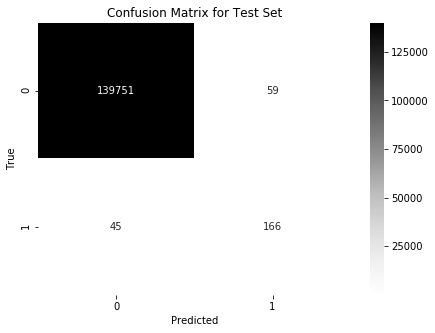

In [383]:
auc = metrics.roc_auc_score(val_y, clf.predict(val_X))        
print("XGB AUPRC performance on second day ", auc)

cm_test = metrics.confusion_matrix(val_y, clf.predict(val_X))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, 
            annot = True, 
            cmap = 'Greys', 
            xticklabels = ['0','1'], 
            yticklabels = ['0','1'],
            fmt = '.0f')
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

# look at results
print("\nClassification Report\n")
print(metrics.classification_report(val_y, clf.predict(val_X)))

## 7. Conclusão

Ao final de nossas análises, podemos afirmar que encontramos um classificador que identifica, em cenário real, 4 a cada 5 transações fraudulentas (aproximadamente 80% de transações fraudulentas), com uma quantidade muito pequena de falsos positivos.

Isso é possível pela estratégia de solução que selecionamos ao longo de nossa análise, que consistiu em:
- **não remover nenhum *outlier***: verificamos que era melhor para o modelo mantê-los;
- **dividir as transações em dois dias**: as amostras do primeiro dia para fazer o modelo (50% dos dados para treino e 50% para teste, com *grid search* e seleção inteligente de *features*); e as amostras do segundo dia para testar o modelo final obtido (modelo calibrado);
- **AUC final no conjunto de testes**: 0.8932.
- **classificador final**: XGBoost Classifier com os parâmetros {'subsample': 1.0, 'learning_rate': 0.5, 'max_depth': 5}

        XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
           max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
           n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=True, subsample=1.0))])

É um resultado muito bom e ajuda a concluir que, para esse contexto, não agrega ao modelo ter todos os dados de transação de dois dias. Descobrimos que com apenas os dados de um dia pode-se encontrar um excelente classificador. No entanto, como trabalho futuro, seria interessante explorar mais as características das transações e ver o impacto no desempenho do estimador em dados reais quando utilizamos técnicas que possam diminuir o desbalanceamento do Dataset. Também seria legal variar mais parâmetros do XGBoost e testar outros métodos, como MLP, Deep Learning, etc.

## 8. Referências

> Credit Card Fraud Detection: https://www.kaggle.com/mlg-ulb/creditcardfraud

> Highlighting Outliers in your Data with the Tukey Method:
http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

> SelectKBest sklearn: 
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

> ROC AUC Score sklearn: 
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

> StratifiedShuffleSplit sklearn: 
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit

> XGBoost API: http://xgboost.readthedocs.io/en/latest/python/python_api.html#

> Model evaluation: quantifying the quality of predictions: 
http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

> GridSearchCV sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
